In [138]:
#import the necessary libraries

import pandas as pd
from sklearn.preprocessing import label_binarize
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

In [139]:
#to ignore warnings

import warnings
warnings.filterwarnings('ignore')

In [140]:
#loading the training and testing datasets

train = pd.read_csv(r"C:\Users\cppra\Insurance Fraud - TRAIN-3000.csv")
test = pd.read_csv(r"C:\Users\cppra\Insurance Fraud -TEST-12900.csv")

print(train.shape)
print(test.shape)

(2999, 32)
(12918, 32)


In [141]:
#displays information about the columns

train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2999 entries, 0 to 2998
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   MONTH                 2999 non-null   object
 1   WEEKOFMONTH           2999 non-null   int64 
 2   DAYOFWEEK             2999 non-null   object
 3   MAKE                  2999 non-null   object
 4   ACCIDENTAREA          2999 non-null   object
 5   DAYOFWEEKCLAIMED      2999 non-null   object
 6   MONTHCLAIMED          2999 non-null   object
 7   WEEKOFMONTHCLAIMED    2999 non-null   int64 
 8   SEX                   2999 non-null   object
 9   MARITALSTATUS         2999 non-null   object
 10  AGE                   2999 non-null   int64 
 11  FAULT                 2999 non-null   object
 12  POLICYTYPE            2999 non-null   object
 13  VEHICLECATEGORY       2999 non-null   object
 14  VEHICLEPRICE          2999 non-null   object
 15  REPNUMBER             2999 non-null   

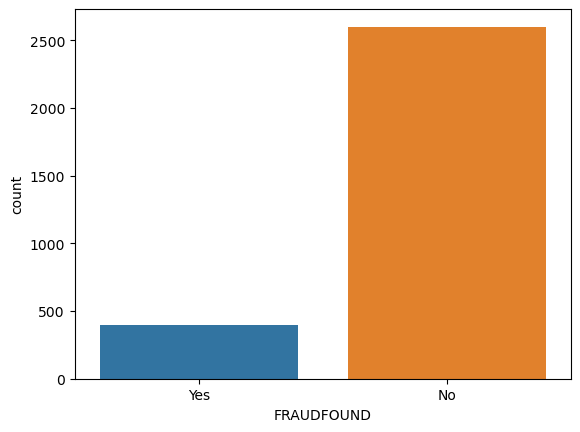

In [142]:
#bar graph showing the counts of each target value

sns.countplot(x="FRAUDFOUND", data=train)
plt.show()

In [143]:
#getting list of names of all columns from a dataframe

TrainCols = list(train.columns.values)
TestCols = list(test.columns.values)
print(TrainCols)
print(TestCols)

['MONTH', 'WEEKOFMONTH', 'DAYOFWEEK', 'MAKE', 'ACCIDENTAREA', 'DAYOFWEEKCLAIMED', 'MONTHCLAIMED', 'WEEKOFMONTHCLAIMED', 'SEX', 'MARITALSTATUS', 'AGE', 'FAULT', 'POLICYTYPE', 'VEHICLECATEGORY', 'VEHICLEPRICE', 'REPNUMBER', 'DEDUCTIBLE', 'DRIVERRATING', 'DAYS_POLICY_ACCIDENT', 'DAYS_POLICY_CLAIM', 'PASTNUMBEROFCLAIMS', 'AGEOFVEHICLE', 'AGEOFPOLICYHOLDER', 'POLICEREPORTFILED', 'WITNESSPRESENT', 'AGENTTYPE', 'NUMBEROFSUPPLIMENTS', 'ADDRESSCHANGE_CLAIM', 'NUMBEROFCARS', 'YEAR', 'BASEPOLICY', 'FRAUDFOUND']
['MONTH', 'WEEKOFMONTH', 'DAYOFWEEK', 'MAKE', 'ACCIDENTAREA', 'DAYOFWEEKCLAIMED', 'MONTHCLAIMED', 'WEEKOFMONTHCLAIMED', 'SEX', 'MARITALSTATUS', 'AGE', 'FAULT', 'POLICYTYPE', 'VEHICLECATEGORY', 'VEHICLEPRICE', 'REPNUMBER', 'DEDUCTIBLE', 'DRIVERRATING', 'DAYS_POLICY_ACCIDENT', 'DAYS_POLICY_CLAIM', 'PASTNUMBEROFCLAIMS', 'AGEOFVEHICLE', 'AGEOFPOLICYHOLDER', 'POLICEREPORTFILED', 'WITNESSPRESENT', 'AGENTTYPE', 'NUMBEROFSUPPLIMENTS', 'ADDRESSCHANGE_CLAIM', 'NUMBEROFCARS', 'YEAR', 'BASEPOLICY', 'F

In [144]:
#seperate Target column from Train Data

Xtrain = train[TrainCols[0:len(TrainCols)-1]].copy()
Ytrain = train[['FRAUDFOUND']].copy()
print("Train Set shape:")
print(Xtrain.shape)
print(Ytrain.shape)
Xtest = test[TestCols[0:len(TestCols)-1]].copy()
Ytest = test[['FRAUDFOUND']].copy()
print("Test Set shape:")
print(Xtest.shape)
print(Ytest.shape)

Train Set shape:
(2999, 31)
(2999, 1)
Test Set shape:
(12918, 31)
(12918, 1)


In [145]:
#stores categorical features in an array

categoricalFeatures = Xtrain.select_dtypes(include=['object']).columns.to_list()

In [146]:
#OneHotEncoding done on categorical variables in Train data

ohe = OneHotEncoder(handle_unknown='ignore',sparse=False)
Xcat = pd.DataFrame(ohe.fit_transform(Xtrain[categoricalFeatures]),columns=ohe.get_feature_names_out(),index=Xtrain.index)
Xtrain = pd.concat([Xtrain,Xcat],axis=1)
Xtrain.drop(labels=categoricalFeatures,axis=1,inplace=True)
Xtrain.sample(5)

,MONTH_Apr,MONTH_Aug,MONTH_Dec,MONTH_Feb,MONTH_Jan,MONTH_Jul,MONTH_Jun,MONTH_Mar,MONTH_May,MONTH_Nov,...,NUMBEROFCARS_1-vehicle,NUMBEROFCARS_2-vehicles,NUMBEROFCARS_3_to_4,NUMBEROFCARS_5_to_8,YEAR_1994,YEAR_1995,YEAR_1996,BASEPOLICY_All_Perils,BASEPOLICY_Collision,BASEPOLICY_Liability
1029,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
677,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
65,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1980,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2692,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [147]:
#OneHotEncoding done on categorical variables in Test data

Xcat = pd.DataFrame(ohe.transform(Xtest[categoricalFeatures]),columns=ohe.get_feature_names_out(),index=Xtest.index)
Xtest = pd.concat([Xtest,Xcat],axis=1)
Xtest.drop(labels=categoricalFeatures,axis=1,inplace=True)
Xtest.sample(5)

,MONTH_Apr,MONTH_Aug,MONTH_Dec,MONTH_Feb,MONTH_Jan,MONTH_Jul,MONTH_Jun,MONTH_Mar,MONTH_May,MONTH_Nov,...,NUMBEROFCARS_1-vehicle,NUMBEROFCARS_2-vehicles,NUMBEROFCARS_3_to_4,NUMBEROFCARS_5_to_8,YEAR_1994,YEAR_1995,YEAR_1996,BASEPOLICY_All_Perils,BASEPOLICY_Collision,BASEPOLICY_Liability
12493,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
6116,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
11114,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
8761,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3387,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [148]:
#decision tree classifier

dt = DecisionTreeClassifier()
dt.fit(Xtrain, Ytrain)

DecisionTreeClassifier()

In [149]:
#random forest classifier

rf = RandomForestClassifier()
rf.fit(Xtrain, Ytrain)

RandomForestClassifier()

In [150]:
#model accuracy of the decision tree classifier

X_Pred = dt.predict(Xtest)
XPred = dt.predict(Xtrain)

print("Train Accuracy:", metrics.accuracy_score(Ytrain,XPred))
print("Test Accuracy:", metrics.accuracy_score(Ytest,X_Pred))
print("Confusion Matrix for Decision Tree:")
print(confusion_matrix(Ytest,X_Pred))
print("Max Depth",dt.get_depth())
print("Leaf",dt.get_n_leaves())
print('Printing the precision and recall, among other metrics')
print(metrics.classification_report(Ytest, X_Pred))

Train Accuracy: 1.0
Test Accuracy: 0.8902306858646849
Confusion Matrix for Decision Tree:
[[11054  1366]
 [   52   446]]
Max Depth 27
Leaf 275
Printing the precision and recall, among other metrics
              precision    recall  f1-score   support

          No       1.00      0.89      0.94     12420
         Yes       0.25      0.90      0.39       498

    accuracy                           0.89     12918
   macro avg       0.62      0.89      0.66     12918
weighted avg       0.97      0.89      0.92     12918



In [151]:
#model accuracy of the random forest classifier

X_Pred1 = rf.predict(Xtest)
XPred1 = rf.predict(Xtrain)

print("Train Accuracy:", metrics.accuracy_score(Ytrain,XPred1))
print("Test Accuracy:", metrics.accuracy_score(Ytest,X_Pred1))
print("Confusion Matrix for Decision Tree:")
print(confusion_matrix(Ytest,X_Pred1))
print('Printing the precision and recall, among other metrics')
print(metrics.classification_report(Ytest, X_Pred1))

Train Accuracy: 1.0
Test Accuracy: 0.9544821179749187
Confusion Matrix for Decision Tree:
[[11909   511]
 [   77   421]]
Printing the precision and recall, among other metrics
              precision    recall  f1-score   support

          No       0.99      0.96      0.98     12420
         Yes       0.45      0.85      0.59       498

    accuracy                           0.95     12918
   macro avg       0.72      0.90      0.78     12918
weighted avg       0.97      0.95      0.96     12918



In [162]:
#hyperparameter tuning for decision tree classifier

#random search

import time
start_time = time.time()

print("RandomizedSearchCV-Decision tree")
parameters={'min_samples_leaf' : range(10,300,10),'max_depth': 
            range(5,30,2),'criterion':['gini','entropy']}
dt_random = RandomizedSearchCV(dt,parameters,n_iter=25,cv=5)
dt_random.fit(Xtrain, Ytrain)
grid_parm=dt_random.best_params_
print(grid_parm)
print("accuracy Score for Decision Tree:{0:6f}".
      format(dt_random.score(Xtest,Ytest)))

print("--- %s seconds ---" % (time.time() - start_time))

RandomizedSearchCV-Decision tree
{'min_samples_leaf': 40, 'max_depth': 7, 'criterion': 'entropy'}
accuracy Score for Decision Tree:0.893482
--- 11.663054704666138 seconds ---


In [163]:
#grid search

import time
start_time = time.time()

print("GridSearchCV-Decision tree")
dt_grid = GridSearchCV(dt,parameters)
dt_grid.fit(Xtrain, Ytrain)
grid_parm1=dt_grid.best_params_
print(grid_parm1)
print("accuracy Score for Decision Tree:{0:6f}".
      format(dt_grid.score(Xtest,Ytest)))

print("--- %s seconds ---" % (time.time() - start_time))

GridSearchCV-Decision tree
{'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 30}
accuracy Score for Decision Tree:0.893482
--- 284.2454879283905 seconds ---


In [164]:
#using the parameters obtained from HyperParameterTuning in the DecisionTreeClassifier

dtRand = DecisionTreeClassifier(**grid_parm)
dtGrid = DecisionTreeClassifier(**grid_parm1)

dtRand.fit(Xtrain,Ytrain)
dtRand_predict = dtRand.predict(Xtest)
dtGrid.fit(Xtrain,Ytrain)
dtGrid_predict = dtGrid.predict(Xtest)

In [165]:
#accuracy for Decision Tree using Random Search CV for Hyperparameter Tuning

print("Test Accuracy:", metrics.accuracy_score(Ytest,dtRand_predict))
print("Confusion Matrix for Decision Tree:")
print(confusion_matrix(Ytest,dtRand_predict))
print('Printing the precision and recall, among other metrics')
print(metrics.classification_report(Ytest, dtRand_predict))
clf_cv_score = cross_val_score(dtRand, Xtrain, Ytrain, cv=5, scoring="balanced_accuracy")
print(clf_cv_score)

Test Accuracy: 0.8934819631521908
Confusion Matrix for Decision Tree:
[[11378  1042]
 [  334   164]]
Printing the precision and recall, among other metrics
              precision    recall  f1-score   support

          No       0.97      0.92      0.94     12420
         Yes       0.14      0.33      0.19       498

    accuracy                           0.89     12918
   macro avg       0.55      0.62      0.57     12918
weighted avg       0.94      0.89      0.91     12918

[0.74615385 0.73990385 0.54375    0.5        0.55696203]


In [166]:
#accuracy for Decision Tree using Grid Search for Hyperparameter Tuning

print("Test Accuracy:", metrics.accuracy_score(Ytest,dtGrid_predict))
print("Confusion Matrix for Decision Tree:")
print(confusion_matrix(Ytest,dtGrid_predict))
print('Printing the precision and recall, among other metrics')

Test Accuracy: 0.8934819631521908
Confusion Matrix for Decision Tree:
[[11378  1042]
 [  334   164]]
Printing the precision and recall, among other metrics


In [167]:
#hyperparameter tuning done random forest classifier

#random search

import time
start_time = time.time()

print("RandomizedSearchCV-Random forest")
rand_parameters={'min_samples_leaf' : range(10,100,10),'max_depth': 
            range(1,10,2),'max_features':[10,20,30],'n_estimators':[20,30,40]}
rf_random = RandomizedSearchCV(rf,rand_parameters,n_iter=25,cv=5)
rf_random.fit(Xtrain, Ytrain)
grid_parm=rf_random.best_params_
print(grid_parm)
print("accuracy Score for Decision Tree:{0:6f}".
      format(rf_random.score(Xtest,Ytest)))

print("--- %s seconds ---" % (time.time() - start_time))

RandomizedSearchCV-Random forest
{'n_estimators': 40, 'min_samples_leaf': 60, 'max_features': 30, 'max_depth': 9}
accuracy Score for Decision Tree:0.961449
--- 36.332221031188965 seconds ---


In [168]:
#grid search

import time
start_time = time.time()

print("GridSearchCV-Random Forest")
rf_grid = GridSearchCV(rf,rand_parameters)
rf_grid.fit(Xtrain, Ytrain)
grid_parm1=rf_grid.best_params_
print(grid_parm1)
print("accuracy Score for Decision Tree:{0:6f}".
      format(rf_grid.score(Xtest,Ytest)))

print("--- %s seconds ---" % (time.time() - start_time))

GridSearchCV-Random Forest
{'max_depth': 9, 'max_features': 30, 'min_samples_leaf': 10, 'n_estimators': 40}
accuracy Score for Decision Tree:0.929865
--- 514.5674405097961 seconds ---


In [169]:
#using the parameters obtained from HyperParameterTuning in the RandomForestClassifier

rfRand = RandomForestClassifier(**grid_parm)
rfGrid = RandomForestClassifier(**grid_parm1)

rfRand.fit(Xtrain,Ytrain)
rfRand_predict = rfRand.predict(Xtest)
rfGrid.fit(Xtrain,Ytrain)
rfGrid_predict = rfGrid.predict(Xtest)

In [170]:
#accuracy for Random Forest using Random Search CV for Hyperparameter Tuning

print("Test Accuracy:", metrics.accuracy_score(Ytest,rfRand_predict))
print("Confusion Matrix for Decision Tree:")
print(confusion_matrix(Ytest,rfRand_predict))
print('Printing the precision and recall, among other metrics')
print(metrics.classification_report(Ytest, rfRand_predict))
clf_cv_score = cross_val_score(rfRand, Xtrain, Ytrain, cv=5, scoring="balanced_accuracy")
print(clf_cv_score)

Test Accuracy: 0.9614491407338597
Confusion Matrix for Decision Tree:
[[12420     0]
 [  498     0]]
Printing the precision and recall, among other metrics
              precision    recall  f1-score   support

          No       0.96      1.00      0.98     12420
         Yes       0.00      0.00      0.00       498

    accuracy                           0.96     12918
   macro avg       0.48      0.50      0.49     12918
weighted avg       0.92      0.96      0.94     12918

[0.5 0.5 0.5 0.5 0.5]


In [171]:
#accuracy for Random Forest using Grid Search for Hyperparameter Tuning

print("Test Accuracy:", metrics.accuracy_score(Ytest,rfGrid_predict))
print("Confusion Matrix for Decision Tree:")
print(confusion_matrix(Ytest,rfGrid_predict))
print('Printing the precision and recall, among other metrics')
print(metrics.classification_report(Ytest, rfGrid_predict))

Test Accuracy: 0.9269236723951076
Confusion Matrix for Decision Tree:
[[11846   574]
 [  370   128]]
Printing the precision and recall, among other metrics
              precision    recall  f1-score   support

          No       0.97      0.95      0.96     12420
         Yes       0.18      0.26      0.21       498

    accuracy                           0.93     12918
   macro avg       0.58      0.61      0.59     12918
weighted avg       0.94      0.93      0.93     12918

